# 01 - Benchmark

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
import requests
from yaml import load, Loader
import prody as pdy
plt.rcParams['svg.fonttype'] = 'none'

/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
tmscores = pd.read_csv('../data/benchmark/ddkk/TM.scores.csv', sep='\t', comment='#', header=None)
tmscores.columns=['pdb1', 'pdb2', 'tm-score', 'tm-score2', 'rmsd', 'id1', 'id2', 'idali', 'l1', 'l2', 'lali']
# tmscores['pdb1'] = tmscores['pdb1'].apply(lambda x: x.split('.')[0])
# tmscores['pdb1'] = tmscores['pdb1'].apply(lambda x: x.split('_')[0] + ' / ' + x.split('_')[1][0] + '.' + ' ' + x.split('_')[2])
# tmscores['pdb2'] = tmscores['pdb2'].apply(lambda x: x.split('.')[1])
tmscores

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali
0,1QH8_001.colabfold.rechained.pdb:A:D:E:B,nif_Azotobacter_vinelandii.3MIN.pdb:D:A:B:E,0.9850,0.9925,0.75,0.700,0.705,0.709,1994,1979,1970
1,1QH8_001.colabfold.rechained.pdb:A:D:E:B,nif_Azotobacter_vinelandii.2MIN.pdb:D:A:B:E,0.9852,0.9927,0.73,0.700,0.705,0.709,1994,1979,1970
2,1QH8_001.colabfold.rechained.pdb:A:D:E:B,AK013.xtal.pdb:A:C:D:B,0.9941,0.9921,0.75,0.708,0.706,0.710,1994,1998,1988
3,1QH8_001.colabfold.rechained.pdb:A:D:E:B,nif_Azotobacter_vinelandii.1FP4.pdb:A:D:E:B,0.9849,0.9923,0.77,0.699,0.704,0.708,1994,1979,1970
4,1QH8_001.colabfold.rechained.pdb:A:D:E:B,nif_Azotobacter_vinelandii.3U7Q.pdb:D:A:B:E,0.9950,0.9930,0.77,0.703,0.702,0.705,1994,1998,1990
...,...,...,...,...,...,...,...,...,...,...,...
2380,AK023_005.colabfold.rechained.pdb:A:D:B:E::,vnf_Azotobacter_vinelandii.5N6Y.pdb:A:D:B:E:C:F,0.8643,0.8462,2.69,0.283,0.277,0.317,2052,2097,1832
2381,AK023_005.colabfold.rechained.pdb:A:D:B:E::,vnf_Azotobacter_vinelandii.6FEA.pdb:A:D:B:E:C:F,0.8621,0.8532,2.58,0.284,0.281,0.319,2052,2074,1824
2382,AK023_005.colabfold.rechained.pdb:A:D:B:E::,vnf_Azotobacter_vinelandii.7ADR.pdb:A:D:B:E:C:F,0.8643,0.8446,2.69,0.283,0.277,0.317,2052,2101,1832
2383,AK023_005.colabfold.rechained.pdb:A:D:B:E::,vnf_Azotobacter_vinelandii.7ADY.pdb:A:D:B:E:C:F,0.8644,0.8446,2.69,0.283,0.277,0.317,2052,2101,1832


In [3]:
with open('../data/benchmark/ddkk/mapping.yml') as f:
    mapping = load(f, Loader)

In [4]:
pdb_structures = tmscores[:1590].copy()
einsle_structures = tmscores[1590:].copy()

In [5]:
pdb_structures['pdb1'] = pdb_structures['pdb1'].apply(lambda x: mapping['mapping'][x.split('_')[0]])
pdb_structures['pdb2'] = pdb_structures['pdb2'].apply(lambda x: x.split('.')[0])
pdb_structures['fancy_name'] = pdb_structures['pdb1'].apply(lambda x: mapping['fancy_name'][x])
pdb_structures

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali,fancy_name
0,nif_Klebsiella_pneumoniae,nif_Azotobacter_vinelandii,0.9850,0.9925,0.75,0.700,0.705,0.709,1994,1979,1970,Nif / K. pneumoniae
1,nif_Klebsiella_pneumoniae,nif_Azotobacter_vinelandii,0.9852,0.9927,0.73,0.700,0.705,0.709,1994,1979,1970,Nif / K. pneumoniae
2,nif_Klebsiella_pneumoniae,AK013,0.9941,0.9921,0.75,0.708,0.706,0.710,1994,1998,1988,Nif / K. pneumoniae
3,nif_Klebsiella_pneumoniae,nif_Azotobacter_vinelandii,0.9849,0.9923,0.77,0.699,0.704,0.708,1994,1979,1970,Nif / K. pneumoniae
4,nif_Klebsiella_pneumoniae,nif_Azotobacter_vinelandii,0.9950,0.9930,0.77,0.703,0.702,0.705,1994,1998,1990,Nif / K. pneumoniae
...,...,...,...,...,...,...,...,...,...,...,...,...
1585,anf_Azotobacter_vinelandii,vnf_Azotobacter_vinelandii,0.9455,0.9872,1.29,0.513,0.536,0.539,2190,2097,2087,Anf/ A. vinelandii
1586,anf_Azotobacter_vinelandii,vnf_Azotobacter_vinelandii,0.9354,0.9874,1.26,0.512,0.541,0.544,2190,2074,2064,Anf/ A. vinelandii
1587,anf_Azotobacter_vinelandii,vnf_Azotobacter_vinelandii,0.9457,0.9856,1.31,0.513,0.535,0.538,2190,2101,2088,Anf/ A. vinelandii
1588,anf_Azotobacter_vinelandii,vnf_Azotobacter_vinelandii,0.9458,0.9857,1.30,0.513,0.535,0.538,2190,2101,2088,Anf/ A. vinelandii


In [6]:
pdb_structures['is_same_species'] = pdb_structures.apply(lambda x: x.pdb1 == x.pdb2, axis=1)
pdb_structures = pdb_structures.query('is_same_species == True')

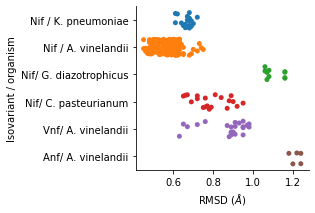

In [67]:
g = sns.catplot(data=pdb_structures, x='rmsd', y='fancy_name', aspect=1.5, height=3.0, jitter=0.3)
g.set_xlabels('RMSD ($\AA$)')
g.set_ylabels('Isovariant / organism')
g.savefig('../figures/ddkk-benchmark-allpdb.svg')
g.savefig('../figures/ddkk-benchmark-allpdb.png', dpi=300)

In [7]:
einsle_structures['original_pdb1'] = einsle_structures['pdb1']
einsle_structures['pdb1'] = einsle_structures['pdb1'].apply(lambda x: x.split('_')[0])
einsle_structures['pdb2'] = einsle_structures['pdb2'].apply(lambda x: x.split('.')[0])
einsle_structures['is_same_structure'] = einsle_structures.apply(lambda x: x.pdb1 == x.pdb2, axis=1)
einsle_structures = einsle_structures.query('is_same_structure == True').copy()
einsle_structures

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali,original_pdb1,is_same_structure
1596,AK013,AK013,0.9717,0.9980,0.63,0.973,0.999,0.999,2052,1998,1998,AK013_001.colabfold.rechained.pdb:D:A:B:E,True
1648,AK013,AK013,0.9724,0.9987,0.51,0.973,0.999,0.999,2052,1998,1998,AK013_002.colabfold.rechained.pdb:D:A:B:E,True
1700,AK013,AK013,0.9718,0.9980,0.62,0.973,0.999,0.999,2052,1998,1998,AK013_003.colabfold.rechained.pdb:D:A:E:B,True
1754,AK013,AK013,0.9721,0.9984,0.56,0.973,0.999,0.999,2052,1998,1998,AK013_004.colabfold.rechained.pdb:A:D:B:E,True
1804,AK013,AK013,0.9720,0.9983,0.58,0.973,0.999,0.999,2052,1998,1998,AK013_005.colabfold.rechained.pdb:D:A:E:B,True
1861,AK014,AK014,0.9833,0.9981,0.61,0.981,0.995,0.995,2028,1998,1998,AK014_001.colabfold.rechained.pdb:A:D:B:E,True
1914,AK014,AK014,0.9829,0.9977,0.68,0.981,0.995,0.995,2028,1998,1998,AK014_002.colabfold.rechained.pdb:D:A:E:B,True
1963,AK014,AK014,0.9830,0.9978,0.66,0.981,0.995,0.995,2028,1998,1998,AK014_003.colabfold.rechained.pdb:D:A:E:B,True
2020,AK014,AK014,0.9835,0.9983,0.58,0.981,0.996,0.996,2028,1998,1998,AK014_004.colabfold.rechained.pdb:D:A:E:B,True
2068,AK014,AK014,0.9835,0.9983,0.58,0.981,0.995,0.995,2028,1998,1998,AK014_005.colabfold.rechained.pdb:A:D:B:E,True


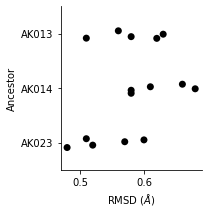

In [80]:
g = sns.catplot(
    x='rmsd', y='pdb1', data=einsle_structures, height=3.0, s=7, color='black'
)
g.set_xlabels('RMSD ($\AA$)')
g.set_ylabels('Ancestor')
g.savefig('../figures/ddkk-benchmark-xtals.svg')
g.savefig('../figures/ddkk-benchmark-xtals.png', dpi=300)

In [84]:
einsle_structures[['original_pdb1', 'pdb1', 'rmsd']].query('pdb1 == "AK013"').sort_values(by='rmsd', ascending=True)

,original_pdb1,pdb1,rmsd
1648,AK013_002.colabfold.rechained.pdb:D:A:B:E,AK013,0.51
1754,AK013_004.colabfold.rechained.pdb:A:D:B:E,AK013,0.56
1804,AK013_005.colabfold.rechained.pdb:D:A:E:B,AK013,0.58
1700,AK013_003.colabfold.rechained.pdb:D:A:E:B,AK013,0.62
1596,AK013_001.colabfold.rechained.pdb:D:A:B:E,AK013,0.63


## Figure 1.c

In [195]:
prediction = pdy.parsePDB('../data/benchmark/ddkk-ak013-alignment/aligned.pdb')
target = pdy.parsePDB('../data/benchmark/ddkk-ak013-alignment/AK013.xtal.pdb')
target.setBetas(0.0)

In [196]:
# D:A:B:E	AK013.xtal.pdb:A:C:D:B
# A:C:D:B       D:A:B:E
chain_map = {
    "D": "A",
    "A": "C",
    "B": "D",
    "E": "B"
}

offset = {
    "C": 10,
    "A": 10,
    "B": 0,
    "D": 0
    
}

In [197]:
target_df = []
chains = []
for residue in target.iterResidues():
    try:
        atom = list(residue.select('name CA').iterAtoms())[0]
    except: 
        continue
    target_df.append(
        dict(
            chid=atom.getChid(), coords=atom.getCoords(), resname=atom.getResname(),
            resnum=atom.getResnum(), residue=residue
        )
    )
    
prediction_df = []
for atom in prediction.select('name CA').iterAtoms():
    prediction_df.append(
        dict(
            chid=chain_map[atom.getChid()], coords=atom.getCoords(), resname=atom.getResname(),
            resnum=atom.getResnum() - offset[chain_map[atom.getChid()]]
        )
    )

In [198]:
prediction_df = pd.DataFrame.from_records(prediction_df)
target_df = pd.DataFrame.from_records(target_df)


In [199]:
target_vs_prediction = pd.merge(target_df, prediction_df, on=['resnum', 'resname', 'chid'], how='inner')
target_vs_prediction['distance'] = target_vs_prediction.apply(lambda x: np.linalg.norm(x.coords_x - x.coords_y), axis=1)
target_vs_prediction.apply(lambda x: x.residue.setBetas(x.distance), axis=1)
target_vs_prediction


,chid,coords_x,resname,resnum,residue,coords_y,distance
0,A,"[20.386, -11.124, 1.664]",SER,5,"(((Atom N (index 0))), ((Atom CA (index 1))), ...","[20.23, -11.621, 0.834]",0.979921
1,A,"[17.939, -11.616, -1.3]",ARG,6,"(((Atom N (index 6))), ((Atom CA (index 7))), ...","[17.714, -11.868, -1.921]",0.706944
2,A,"[19.2, -15.188, -1.961]",ASP,7,"(((Atom N (index 11))), ((Atom CA (index 12)))...","[18.996, -15.35, -2.791]",0.869920
3,A,"[19.106, -15.888, 1.833]",GLU,8,"(((Atom N (index 16))), ((Atom CA (index 17)))...","[18.669, -16.46, 0.816]",1.245970
4,A,"[15.35, -14.965, 1.824]",VAL,9,"(((Atom N (index 21))), ((Atom CA (index 22)))...","[15.119, -15.207, 1.054]",0.839539
...,...,...,...,...,...,...,...
1992,D,"[-15.907, -1.445, 29.57]",HIS,519,"(((Atom N (index 15700))), ((Atom CA (index 15...","[-15.721, -1.507, 29.553]",0.196797
1993,D,"[-14.364, -4.037, 27.231]",ASP,520,"(((Atom N (index 15710))), ((Atom CA (index 15...","[-14.339, -4.19, 27.103]",0.201042
1994,D,"[-15.839, -7.531, 26.947]",LEU,521,"(((Atom N (index 15718))), ((Atom CA (index 15...","[-15.715, -7.715, 26.99]",0.226011
1995,D,"[-12.365, -8.981, 26.154]",VAL,522,"(((Atom N (index 15726))), ((Atom CA (index 15...","[-12.352, -9.156, 25.971]",0.253541


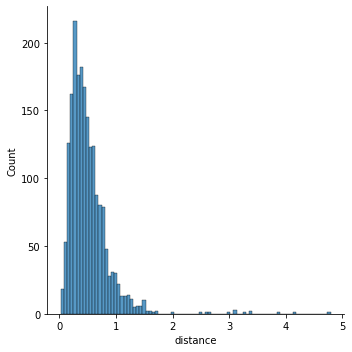

In [200]:
sns.displot(data=target_vs_prediction, x='distance')

In [201]:
pdy.writePDB('../data/benchmark/ddkk-ak013-alignment/ak013-bfactor-distance.pdb', target)

'../data/benchmark/ddkk-ak013-alignment/ak013-bfactor-distance.pdb'

In [14]:
import prody as pdy

In [15]:
with open('../data/benchmark/ddkk/.predictions') as f:
    predictions = list(map(lambda x: x.strip(), f.readlines()))

In [29]:
prediction_pLDDT = []
for pdb in predictions:
    p = pdy.parsePDB('../data/benchmark/ddkk/' + pdb)
    betas = np.mean(p.select('name CA').getBetas())
    try:
        organism = mapping['mapping'][pdb.split('_')[0]]
    except KeyError:
        continue
    prediction_pLDDT.append(
        dict(
            organism=organism, pLDDT=betas, pdb=pdb
        )
    )

In [30]:
prediction_pLDDT = pd.DataFrame.from_records(prediction_pLDDT)

In [31]:
prediction_pLDDT

,organism,pLDDT,pdb
0,nif_Klebsiella_pneumoniae,96.100913,1QH8_001.colabfold.rechained.pdb
1,nif_Klebsiella_pneumoniae,95.460522,1QH8_002.colabfold.rechained.pdb
2,nif_Klebsiella_pneumoniae,95.778415,1QH8_003.colabfold.rechained.pdb
3,nif_Klebsiella_pneumoniae,95.430416,1QH8_004.colabfold.rechained.pdb
4,nif_Klebsiella_pneumoniae,95.595341,1QH8_005.colabfold.rechained.pdb
5,nif_Azotobacter_vinelandii,95.437084,3U7Q_001.colabfold.rechained.pdb
6,nif_Azotobacter_vinelandii,95.045803,3U7Q_002.colabfold.rechained.pdb
7,nif_Azotobacter_vinelandii,94.357975,3U7Q_003.colabfold.rechained.pdb
8,nif_Azotobacter_vinelandii,94.466788,3U7Q_004.colabfold.rechained.pdb
9,nif_Azotobacter_vinelandii,95.632005,3U7Q_005.colabfold.rechained.pdb


In [34]:
tmscores = pd.read_csv('../data/benchmark/ddkk/TM.scores.csv', sep='\t', comment='#', header=None)
tmscores.columns=['pdb1', 'pdb2', 'tm-score', 'tm-score2', 'rmsd', 'id1', 'id2', 'idali', 'l1', 'l2', 'lali']
pdb_structures = tmscores[:1590].copy()
pdb_structures['organism'] = pdb_structures['pdb1'].apply(lambda x: mapping['mapping'][x.split('_')[0]])
pdb_structures['pdb2'] = pdb_structures['pdb2'].apply(lambda x: x.split('.')[0])
pdb_structures['pdb1'] = pdb_structures['pdb1'].apply(lambda x: x.split(':')[0])
pdb_structures['is_same_species'] = pdb_structures.apply(lambda x: x.pdb2 == x.organism, axis=1)
pdb_structures = pdb_structures.query('is_same_species == True')
pdb_structures

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali,organism,is_same_species
42,1QH8_001.colabfold.rechained.pdb,nif_Klebsiella_pneumoniae,0.9981,0.9981,0.61,1.000,1.000,1.0,1994,1994,1994,nif_Klebsiella_pneumoniae,True
43,1QH8_001.colabfold.rechained.pdb,nif_Klebsiella_pneumoniae,0.9981,0.9981,0.61,1.000,1.000,1.0,1994,1994,1994,nif_Klebsiella_pneumoniae,True
44,1QH8_001.colabfold.rechained.pdb,nif_Klebsiella_pneumoniae,0.9977,0.9977,0.66,1.000,1.000,1.0,1994,1994,1994,nif_Klebsiella_pneumoniae,True
45,1QH8_001.colabfold.rechained.pdb,nif_Klebsiella_pneumoniae,0.9980,0.9980,0.62,1.000,1.000,1.0,1994,1994,1994,nif_Klebsiella_pneumoniae,True
94,1QH8_002.colabfold.rechained.pdb,nif_Klebsiella_pneumoniae,0.9976,0.9976,0.67,1.000,1.000,1.0,1994,1994,1994,nif_Klebsiella_pneumoniae,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,8BOQ_001.colabfold.rechained.pdb,anf_Azotobacter_vinelandii,0.9932,0.9941,1.22,0.998,0.999,1.0,2190,2188,2186,anf_Azotobacter_vinelandii,True
1385,8BOQ_002.colabfold.rechained.pdb,anf_Azotobacter_vinelandii,0.9934,0.9943,1.20,0.998,0.999,1.0,2190,2188,2186,anf_Azotobacter_vinelandii,True
1438,8BOQ_003.colabfold.rechained.pdb,anf_Azotobacter_vinelandii,0.9931,0.9940,1.24,0.998,0.999,1.0,2190,2188,2186,anf_Azotobacter_vinelandii,True
1491,8BOQ_004.colabfold.rechained.pdb,anf_Azotobacter_vinelandii,0.9935,0.9944,1.18,0.998,0.999,1.0,2190,2188,2186,anf_Azotobacter_vinelandii,True


In [36]:
prediction_pLDDT = pd.merge(pdb_structures, prediction_pLDDT, how='inner', left_on='pdb1', right_on='pdb')

In [40]:
prediction_pLDDT

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali,organism_x,is_same_species,organism_y,pLDDT,pdb
0,1QH8_001.colabfold.rechained.pdb,nif_Klebsiella_pneumoniae,0.9981,0.9981,0.61,1.000,1.000,1.0,1994,1994,1994,nif_Klebsiella_pneumoniae,True,nif_Klebsiella_pneumoniae,96.100913,1QH8_001.colabfold.rechained.pdb
1,1QH8_001.colabfold.rechained.pdb,nif_Klebsiella_pneumoniae,0.9981,0.9981,0.61,1.000,1.000,1.0,1994,1994,1994,nif_Klebsiella_pneumoniae,True,nif_Klebsiella_pneumoniae,96.100913,1QH8_001.colabfold.rechained.pdb
2,1QH8_001.colabfold.rechained.pdb,nif_Klebsiella_pneumoniae,0.9977,0.9977,0.66,1.000,1.000,1.0,1994,1994,1994,nif_Klebsiella_pneumoniae,True,nif_Klebsiella_pneumoniae,96.100913,1QH8_001.colabfold.rechained.pdb
3,1QH8_001.colabfold.rechained.pdb,nif_Klebsiella_pneumoniae,0.9980,0.9980,0.62,1.000,1.000,1.0,1994,1994,1994,nif_Klebsiella_pneumoniae,True,nif_Klebsiella_pneumoniae,96.100913,1QH8_001.colabfold.rechained.pdb
4,1QH8_002.colabfold.rechained.pdb,nif_Klebsiella_pneumoniae,0.9976,0.9976,0.67,1.000,1.000,1.0,1994,1994,1994,nif_Klebsiella_pneumoniae,True,nif_Klebsiella_pneumoniae,95.460522,1QH8_002.colabfold.rechained.pdb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,8BOQ_001.colabfold.rechained.pdb,anf_Azotobacter_vinelandii,0.9932,0.9941,1.22,0.998,0.999,1.0,2190,2188,2186,anf_Azotobacter_vinelandii,True,anf_Azotobacter_vinelandii,94.710046,8BOQ_001.colabfold.rechained.pdb
246,8BOQ_002.colabfold.rechained.pdb,anf_Azotobacter_vinelandii,0.9934,0.9943,1.20,0.998,0.999,1.0,2190,2188,2186,anf_Azotobacter_vinelandii,True,anf_Azotobacter_vinelandii,95.397420,8BOQ_002.colabfold.rechained.pdb
247,8BOQ_003.colabfold.rechained.pdb,anf_Azotobacter_vinelandii,0.9931,0.9940,1.24,0.998,0.999,1.0,2190,2188,2186,anf_Azotobacter_vinelandii,True,anf_Azotobacter_vinelandii,94.484626,8BOQ_003.colabfold.rechained.pdb
248,8BOQ_004.colabfold.rechained.pdb,anf_Azotobacter_vinelandii,0.9935,0.9944,1.18,0.998,0.999,1.0,2190,2188,2186,anf_Azotobacter_vinelandii,True,anf_Azotobacter_vinelandii,94.519589,8BOQ_004.colabfold.rechained.pdb


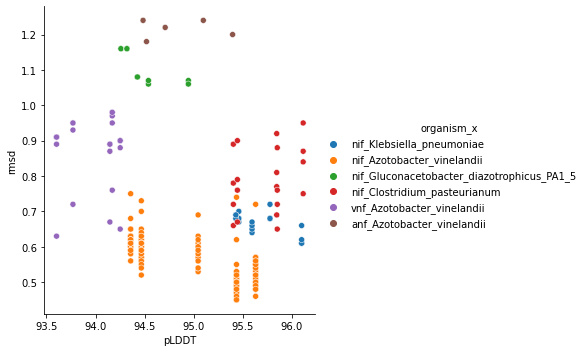

In [41]:
sns.relplot(x='pLDDT', y='rmsd', data=prediction_pLDDT, hue='organism_x')